In [1]:
%cd /teamspace/studios/this_studio/Deeplab/
from inference.infer import *
from post_processing.control_random_field import *

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/teamspace/studios/this_studio/Deeplab


In [3]:
import os
print(len(os.listdir('/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/probs')))

3985


In [4]:
not_processed = []

In [5]:
def img_to_np(img_path):
    dir_path, file_name = os.path.split(img_path)
    
    
    # Replace the 'probs' directory with 'samples'
    new_dir_path = dir_path.replace('samples', 'probs')
    new_file_name = os.path.splitext(file_name)[0] + '_prob.npy'
    # Change the file extension from .npy to .jpg
    
    
    # Construct the new path
    new_path = os.path.join(new_dir_path, new_file_name)
    
    return new_path

In [6]:
print(img_to_np('/teamspace/studios/this_studio/Deeplab/crf_sam_annotations/samples/eastafrica_acactort_2020.05.08.14.52.18_820f49c8-795b-453e-8eb1-7d473669ab84_img_20200507_152251_66198747.jpg'))

/teamspace/studios/this_studio/Deeplab/crf_sam_annotations/probs/eastafrica_acactort_2020.05.08.14.52.18_820f49c8-795b-453e-8eb1-7d473669ab84_img_20200507_152251_66198747_prob.npy


In [7]:
sample_dir = '/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/samples'
samples = os.listdir(sample_dir)

for sample in samples:
    if not os.path.exists(img_to_np(os.path.join(sample_dir,sample))):
        not_processed.append(sample)
        #print(sample)

In [14]:
def remove_lines_from_file(file_path, entries_to_remove):
    # Read the contents of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Filter out lines that are in the entries_to_remove list
    filtered_lines = [line for line in lines if line.strip() not in entries_to_remove]

    # Write the filtered lines back to the file
    with open(file_path, 'w') as file:
        file.writelines(filtered_lines)

In [11]:
print(not_processed[0][:-4])

eastafrica_gmelarbo_2021.05.26.07.57.41_3.0230813333333337_32.46219800000001_229166e9-994c-4242-ac2e-4c635e180939_img_20210519_124400_7282320644335042953.


In [20]:
file_path = '/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/splits/train.txt'
entries_to_remove = [sample[:-4] for sample in  not_processed]
print(entries_to_remove)

['eastafrica_gmelarbo_2021.05.26.07.57.41_3.0230813333333337_32.46219800000001_229166e9-994c-4242-ac2e-4c635e180939_img_20210519_124400_7282320644335042953', 'eastafrica_gmelarbo_2022.03.22.11.08.22_3.0493790733333332_32.45821069666667_5d35882a-15b6-49c4-9151-17c860095e47_img_20220319_120450_770861221401450137', 'freetown_anacocci_2020.11.05.20.42.25_8.454551666666667_-13.241193333333335_a5b1167d-8ff6-4f21-9353-fd4d711310cc_img_20201105_145740_4498929493240844059', 'freetown_anacocci_2020.11.14.10.11.43_8.457256666666666_-13.243805000000002_27c43279-66d8-4418-a282-074f7b043161_img_20201113_131501_1853254484368453520', 'freetown_glirsepi_2020.11.13.13.46.28_8.43715514_-13.21624338_50c0e7f3-fff3-45c9-9104-9c04e7c28b06_img_20201113_124240_4737915285806061605', 'freetown_gmelarbo_2021.10.06.11.14.29_8.481489233333335_-13.216314000000002_104628e4-2dac-4058-83ce-0d3c2fa7f5fa_img_20211006_110409_7267359184690343243', 'haiti_dombtorr_2021.10.11.15.59.47_-0.21092033333333335_36.49209633333334_2

In [21]:
remove_lines_from_file(file_path, entries_to_remove)

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
def show_mask(img_np, pred, input_box = None):
    plt.figure(figsize=(10, 10))
    # Create a blue mask based on the prediction
    blue_mask = np.zeros_like(img_np)
    blue_mask[:, :, 2] = pred * 255

    # Plot the image and the mask overlay
    plt.imshow(img_np)
    plt.imshow(blue_mask, alpha=0.7)
    if input_box is not None:
        show_box(input_box, plt.gca())

    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.show()
    plt.close()

def get_pred(np_prob_path):
    np_prob = np.load(np_prob_path)
    np_prob = np_prob > 0.5
    return np_prob
    
def convert_path(npy_path):
    # Split the path into directory and file components
    dir_path, file_name = os.path.split(npy_path)
    file_name = file_name.replace('_prob','')
    
    # Replace the 'probs' directory with 'samples'
    new_dir_path = dir_path.replace('probs', 'samples')
    
    # Change the file extension from .npy to .jpg
    new_file_name = os.path.splitext(file_name)[0] + '.jpg'
    
    # Construct the new path
    new_path = os.path.join(new_dir_path, new_file_name)
    
    return new_path

def display_img_from_prob(np_prob_path):
    img = flip(Image.open(convert_path(np_prob_path)))
    pred = get_pred(np_prob_path)
    show_mask(np.array(img), pred)

In [5]:
import random
main_path = '/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/probs'
arrays = os.listdir(main_path)


/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/probs/eastafrica_albiziac_2023.01.03.23.16.14_-5.252521000000001_38.73388466666667_80ceead6-8b2c-4a5f-9781-4b310662e324_img_20230103_172208_8837417582320319918_prob.npy


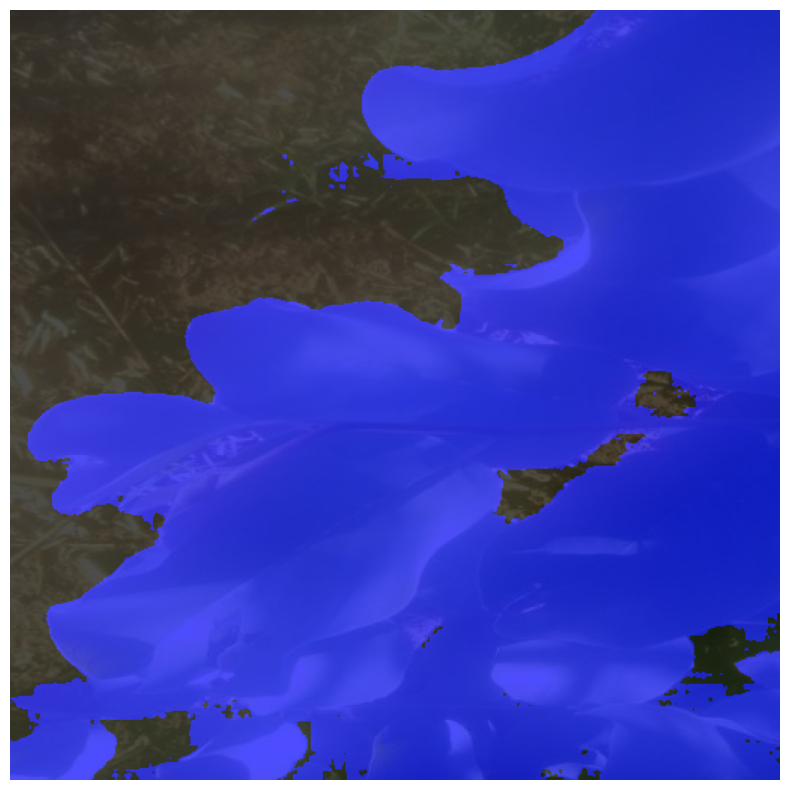

In [9]:
r = random.randint(0, len(arrays))
print(os.path.join(main_path,arrays[r]))
display_img_from_prob(os.path.join(main_path,arrays[r]))

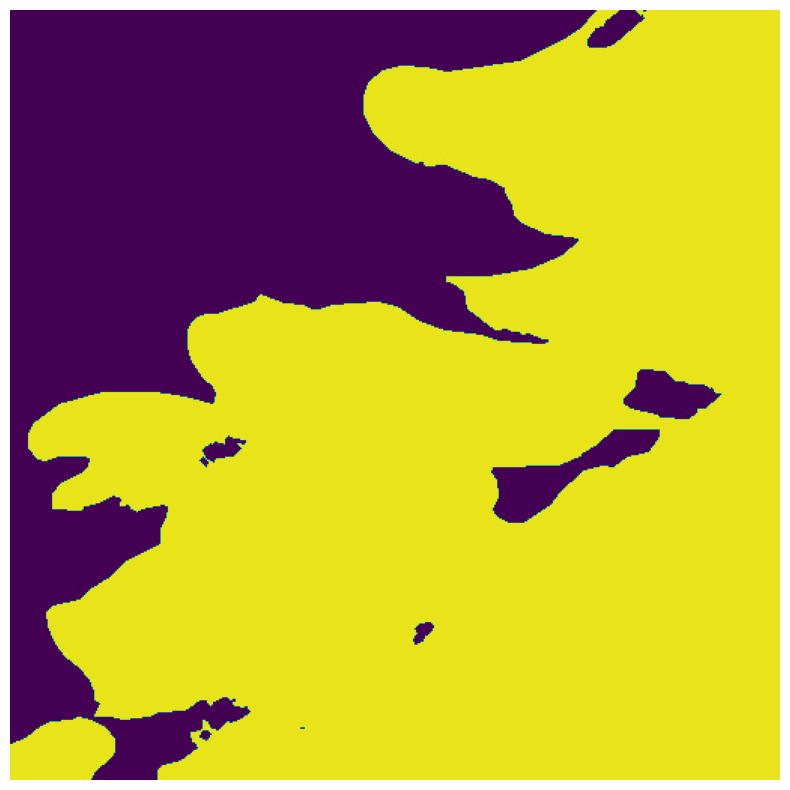

In [10]:
show('/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/binary_masks/eastafrica_albiziac_2023.01.03.23.16.14_-5.252521000000001_38.73388466666667_80ceead6-8b2c-4a5f-9781-4b310662e324_img_20230103_172208_8837417582320319918_binarymask.jpg')

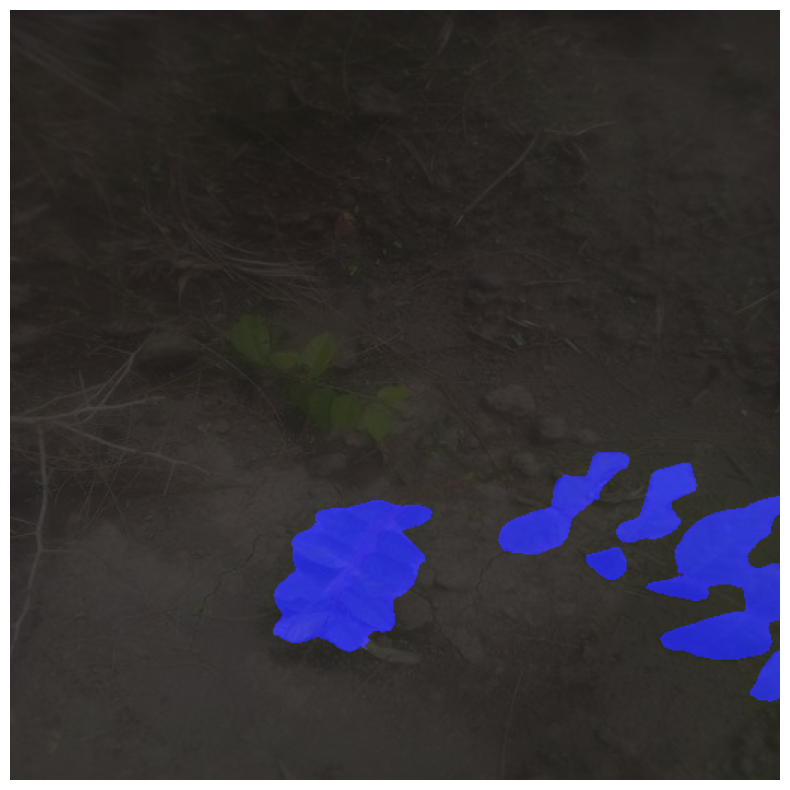

In [20]:
display_img_from_prob('/teamspace/studios/this_studio/Deeplab/crf_sam_annotations_large/probs/eastafrica_acactort_2020.12.13.22.21.58_-3.268136666666666_36.619985_f87ab63e-b968-489a-a80a-1d0547ef74d9_img_20100101_185647_457972301_prob.npy')

In [11]:
print(os.path.split(np_prob_path)[-1][:-4]) # [-4:]

eastafrica_afzeliaa_2023.03.30.15.57.44_2.2052450500000003_31.5069423_f949275f-5e85-4dc5-aac2-9c7cb17df704_img_20230328_102528_2712695584843967361_prob


In [12]:
print((os.path.split(np_prob_path)[-1][:-4]).replace('_prob',''))

eastafrica_afzeliaa_2023.03.30.15.57.44_2.2052450500000003_31.5069423_f949275f-5e85-4dc5-aac2-9c7cb17df704_img_20230328_102528_2712695584843967361
